# Regression Exercise 

California Housing Data

This data set contains information about all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. 

The task is to aproximate the median house value of each block from the values of the rest of the variables. 

 It has been obtained from the LIACC repository. The original page where the data set can be found is: http://www.liaad.up.pt/~ltorgo/Regression/DataSets.html.
 

The Features:
 
* housingMedianAge: continuous. 
* totalRooms: continuous. 
* totalBedrooms: continuous. 
* population: continuous. 
* households: continuous. 
* medianIncome: continuous. 
* medianHouseValue: continuous. 

## The Data

** Import the cal_housing_clean.csv file with pandas. Separate it into a training (70%) and testing set(30%).**

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
housing = pd.read_csv("../sample_data/cal_housing_clean.csv")
housing.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [3]:
housing.describe()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


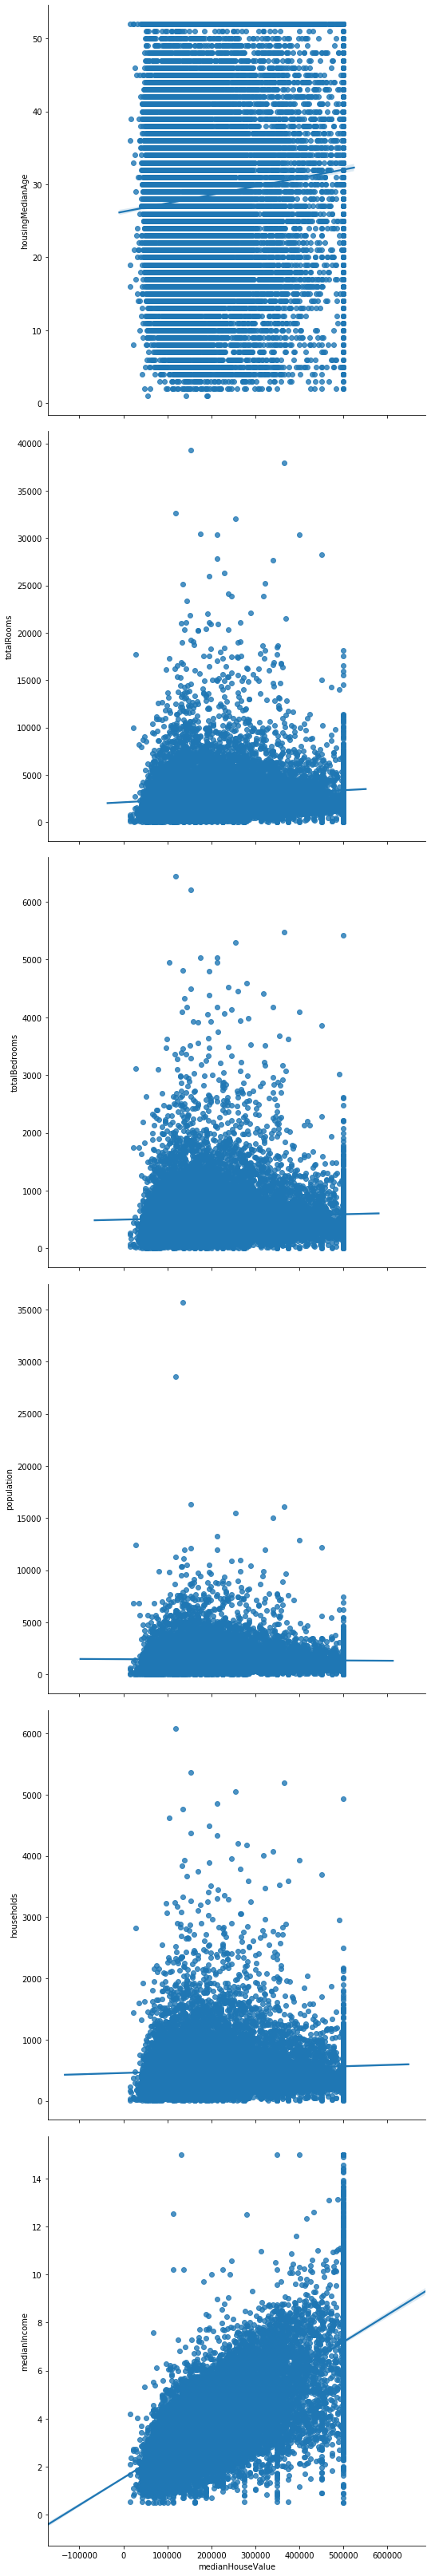

In [4]:
sns.pairplot(
    data=housing,
    x_vars=['medianHouseValue'],
    y_vars=['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome'],
    kind='reg',
    height=7.5
    )

In [5]:
x_data = housing.drop("medianHouseValue", axis=1)
y_labels = housing['medianHouseValue']

In [6]:
x_data.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    x_data, y_labels,
)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15480, 6) (5160, 6) (15480,) (5160,)


### Scale the Feature Data

** Use sklearn preprocessing to create a MinMaxScaler for the feature data. Fit this scaler only to the training data. Then use it to transform X_test and X_train. Then use the scaled X_test and X_train along with pd.Dataframe to re-create two dataframes of scaled data.**

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

In [13]:
X_test.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
16317,0.411765,0.055437,0.080553,0.027238,0.079112,0.118143
14389,0.294118,0.051430,0.062393,0.027833,0.062993,0.297706
2905,0.725490,0.055885,0.060841,0.029409,0.067105,0.172418
3070,0.137255,0.086174,0.123390,0.094423,0.112829,0.085647
4743,0.803922,0.036114,0.042372,0.023492,0.044243,0.164094


### Create Feature Columns

** Create the necessary tf.feature_column objects for the estimator. They should all be trated as continuous numeric_columns. **

In [14]:
import tensorflow as tf

In [15]:
median_age = tf.feature_column.numeric_column('housingMedianAge')
rooms = tf.feature_column.numeric_column('totalRooms')
bedrooms = tf.feature_column.numeric_column('totalBedrooms')
population = tf.feature_column.numeric_column('population')
households = tf.feature_column.numeric_column('households')
income = tf.feature_column.numeric_column('medianIncome')

In [16]:
feat_cols = [
    median_age,
    rooms,
    bedrooms,
    population,
    households,
    income
]

** Create the input function for the estimator object. (play around with batch_size and num_epochs)**

In [17]:
input_func = tf.estimator.inputs.pandas_input_fn(
    X_train,
    y_train,
    batch_size=10,
    num_epochs=1000,
    shuffle=True
)

** Create the estimator model. Use a DNNRegressor. Play around with the hidden units! **

In [18]:
dnn_model = tf.estimator.DNNRegressor(
    hidden_units=[6,6,6,6,6],
    feature_columns=feat_cols
)

W0717 09:15:25.604949 4511147456 estimator.py:1811] Using temporary folder as model directory: /var/folders/rg/qlb5htps7fg440bjyl_5vztc0000gn/T/tmpipubtmhf


##### ** Train the model for ~1,000 steps. (Later come back to this and train it for more and check for improvement) **

In [19]:
dnn_model.train(
    input_fn=input_func,
    steps=30000
)

W0717 09:15:25.662739 4511147456 deprecation.py:323] From /Users/phil/.local/share/virtualenvs/neural_networks-7dtejGdV/lib/python3.6/site-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0717 09:15:25.695869 4511147456 deprecation.py:323] From /Users/phil/.local/share/virtualenvs/neural_networks-7dtejGdV/lib/python3.6/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0717 09:15:25.697690 4511147456 deprecation.py:323] From /Users/phil/.local/share/virtualen

** Create a prediction input function and then use the .predict method off your estimator model to create a list or predictions on your test data. **

In [20]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
    X_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False
)

In [21]:
predictions = [prediction['predictions'] for prediction in dnn_model.predict(pred_input_func)]

W0717 09:16:15.395103 4511147456 deprecation.py:323] From /Users/phil/.local/share/virtualenvs/neural_networks-7dtejGdV/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


** Calculate the RMSE. You should be able to get around 100,000 RMSE (remember that this is in the same units as the label.) Do this manually or use [sklearn.metrics](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) **

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mean_squared_error(y_test, predictions) ** 0.5

78926.56581646568

In [29]:
predictions[:5]

[array([123860.69], dtype=float32),
 array([224721.2], dtype=float32),
 array([185822.64], dtype=float32),
 array([76199.11], dtype=float32),
 array([183462.33], dtype=float32)]

In [28]:
y_test.head()

16317     87500.0
14389    169800.0
2905      91800.0
3070      62200.0
4743     202100.0
Name: medianHouseValue, dtype: float64

Should be < 10000

# Great Job!